# ЗАДАНИЕ

1. Найти и скачать два изображения - серое и цветное, невысокого разрешения и размера (для высокой скорости обработки)

2. Реализовать на сером изображении константное увеличение и уменьшение интенсивности цвета (руками, с использованием numpy)

3. Реализовать на сером изображении константное умножение (к>1, 0<k<1) интенсивности цвета (руками, с использованием numpy)

4. Реализовать на сером изображении гамма-коррекцию интенсивности цвета (руками, с использованием numpy)

5. Реализовать на сером изображении "крутилку" контраста  (руками, с использованием numpy) за счет смешения изображений исходного и максимально контрастного

6. Реализовать преобразование цветного изображения к серому руками с использованием "волшебных" коэффициентов

7. Используя встроенные функции библиотек поменять цветовую схему цветного изображения (как минимум три варианта схем)

# Константное увеличение

In [ ]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from skimage import io
from PIL import Image

img = Image.open('bear.jpg')
arr = np.asarray(img, dtype='uint8')
print(arr.flags)
print(type(arr))
itog = arr.copy()

In [ ]:
print(arr)

In [ ]:
for i in range(len(arr)):
     for j in range(len(arr)):
         for x in range(3):
             print(arr[i][j][x])



In [ ]:
constant=100
for i in range(len(itog)):
    for j in range(len(itog)):
        for x in range(3):
            if itog[i][j][x] + constant <=255:
                itog[i][j][x] += constant
            else: itog[i][j][x] = 255


print(itog)

In [ ]:
io.imshow(itog)

# Константное уменьшение яркости

In [7]:
img = Image.open('bear.jpg')
arr = np.asarray(img, dtype='uint8')
itog = arr.copy()

In [8]:
constant=100
for i in range(len(itog)):
    for j in range(len(itog)):
        for x in range(3):
            if itog[i][j][x] - constant >= 1:
                itog[i][j][x] -= constant
            else: itog[i][j][x] = 1

In [ ]:
io.imshow(itog)

# Константное умножение

In [11]:
img = Image.open('bear.jpg')
arr = np.asarray(img, dtype='uint8')
itog = arr.copy()

In [12]:
constant=2
for i in range(len(itog)):
    for j in range(len(itog)):
        for x in range(3):
            if itog[i][j][x] * constant <= 255:
                itog[i][j][x] *= constant
            else: itog[i][j][x] = 255

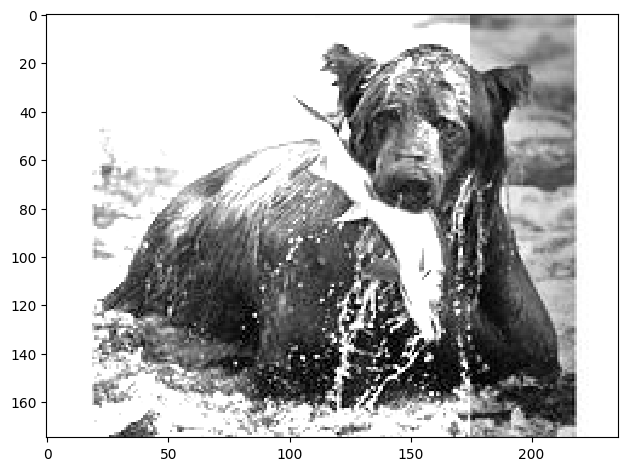

In [13]:
io.imshow(itog)

# Константное деление


In [14]:
img = Image.open('bear.jpg')
arr = np.asarray(img, dtype='uint8')
itog = arr.copy()

In [ ]:
constant=2
for i in range(len(itog)):
    for j in range(len(itog)):
        for x in range(3):
            if itog[i][j][x] / constant >= 1:
                itog[i][j][x] /= constant
            else: itog[i][j][x] = 1


print(itog)

In [ ]:
io.imshow(itog)

# Гамма коррекция яркости +

In [ ]:
img = Image.open('bear.jpg')
arr = np.asarray(img, dtype='uint8')
itog = arr.copy()

In [19]:
constant=1.5
for i in range(len(itog)):
    for j in range(len(itog)):
        for x in range(3):
            if itog[i][j][x] ** constant <= 255:
                itog[i][j][x] = itog[i][j][x] ** constant
            else: itog[i][j][x] = 255

In [ ]:
io.imshow(itog)

# Гамма коррекция яркости -

In [21]:
img = Image.open('bear.jpg')
arr = np.asarray(img, dtype='uint8')
itog = arr.copy()

In [22]:
constant=0.8
for i in range(len(itog)):
    for j in range(len(itog)):
        for x in range(3):
            if itog[i][j][x] ** constant <= 255 and itog[i][j][x] ** constant >= 1:
                itog[i][j][x] = itog[i][j][x] ** constant
            else:
                if itog[i][j][x] ** constant >= 255:
                    itog[i][j][x] = 255
                elif itog[i][j][x] ** constant <= 1:
                    itog[i][j][x] = 1

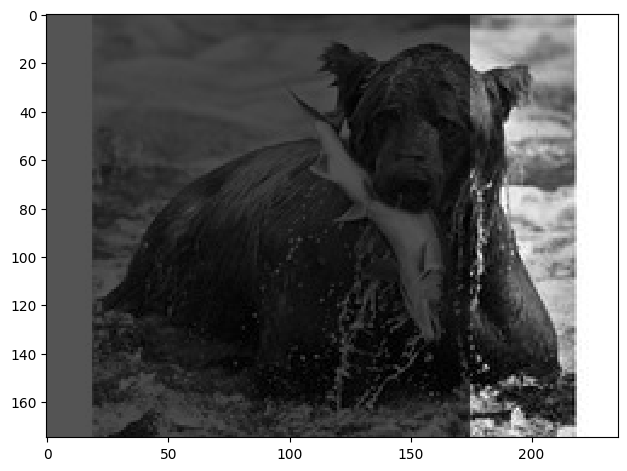

In [23]:
io.imshow(itog)

# преобразование цветного изображения к серому

In [28]:
def convert():
    a = np.asarray(Image.open('tsvetok.jpg'), dtype='uint8')
    b = np.array([[[0.21, 0.72, 0.07]]])
    sums = np.round(np.sum(a * b, axis=2)).astype(np.uint8)
    k = np.repeat(sums, 3).reshape(a.shape)
    Image.fromarray(k).save('result.jpg')

In [29]:
convert()

In [ ]:
img = Image.open('result.jpg')
img

# смешивание изображений

In [ ]:
img = Image.open('bear.jpg')
arr = np.asarray(img, dtype='uint8')
itog = arr.copy()
a=0.9
for i in range(len(itog)):
    for j in range(len(itog)):
        for x in range(3):
            if (a*itog[i][j][x]) ** 1 + ((1-a)*itog[i][j][x]) ** 2 <= 255:
                itog[i][j][x] = (a*itog[i][j][x]) ** 1 + ((1-a)*itog[i][j][x]) ** 2
            else: itog[i][j][x] = 255
io.imshow(itog)

# Изменение контрастности изображения



In [32]:
img = Image.open('bear.jpg')
arr = np.asarray(img, dtype='uint8')
itog = arr.copy()
r, g, b = img.split()

valuer = np.asarray(r, dtype='uint8')
valueg = np.asarray(g, dtype='uint8')
valueb = np.asarray(b, dtype='uint8')

In [33]:
lAB = 0
for i in range(len(arr)):
    for j in range(len(arr)):

        lAB += arr[i][j][0] * 0.299 + arr[i][j][1] * 0.587 + arr[i][j][2] * 0.114

lAB /= len(arr) * len(arr)

In [34]:
#Коэффициент коррекции
correction = 50
b=[]
k = 1.0 + correction / 100.0
for i in range(256):
    delta = i - lAB
    temp  = lAB + k *delta

    if (temp < 0):
        temp = 0

    if (temp >= 255):
        temp = 255

    b.append(temp)


In [35]:
for i in range(len(itog)):
    for j in range(len(itog)):
        for x in range(3):
            val = itog[i][j][x]
            itog[i][j][x] = b[val]

In [ ]:
Image.fromarray(arr,'RGB').show()
Image.fromarray(itog,'RGB').show()
io.imshow(itog)

# Изменение цветовой схемы


In [37]:
def rgb_to_hsv(rgb):
    h, s, v = 0, 0, 0
    r, g, b = rgb[0], rgb[1], rgb[2]
    r, g, b = r / 255.0, g / 255.0, b / 255.0
    cmax = max(r, g, b)
    cmin = min(r, g, b)
    delta = cmax - cmin
    if delta == 0: h = 0
    elif cmax == r: h = ((g - b) / delta) % 6
    elif cmax == g: h = ((b - r) / delta) + 2
    else: h = ((r - g) / delta) + 4
    h = round(h * 60)
    if cmax == 0: s = 0
    else: s = round((delta / cmax) * 100)
    v = round(cmax * 100)
    return (h, s, v)

def hsv_to_rgb(hsv):
    h, s, v = hsv[0], hsv[1], hsv[2]

    h /= 60
    s /= 100
    v /= 100

    c = v * s
    x = c * (1 - abs((h % 2) - 1))
    m = v - c

    if h < 1: r,g,b = c, x, 0
    elif h < 2: r,g,b = x, c, 0
    elif h < 3: r,g,b = 0, c, x
    elif h < 4: r,g,b = 0, x, c
    elif h < 5: r,g,b = x, 0, c
    else: r,g,b = c, 0, x

    r,g,b = (r + m) * 255, (g + m) * 255, (b + m) * 255

    return (r,g,b)

In [38]:
def img_rgb_to_hsv(img):
    # Получение пикселей изображения в виде массива
    img_array = np.asarray(img, dtype='uint8').copy()
    # Получаем размер изображения
    width, height = len(img_array), len(img_array[0])
    for hor in range(width):
        for vert in range(height):
            img_array[hor][vert] = rgb_to_hsv(img_array[hor][vert])
    return img_array

def img_hsv_to_rgb(img):
    # Получаем размер изображения
    width, height = len(img), len(img[0])
    for hor in range(width):
        for vert in range(height):
            img[hor][vert] = hsv_to_rgb(img[hor][vert])
    return img

In [ ]:
img = Image.open('tsvetok.jpg')
hsv = img_rgb_to_hsv(img)
Image.fromarray(hsv)

In [ ]:
rgb = img_hsv_to_rgb(hsv)
Image.fromarray(rgb)

In [41]:
def rgb2cmyk(rgb):
    r=rgb[0]
    g=rgb[1]
    b=rgb[2]
    rgb_scale=255
    cmyk_scale=100
    if (r, g, b) == (0, 0, 0):
        # значит черный
        return 0, 0, 0, cmyk_scale
    # rgb [0,255] -> cmy [0, 1]
    c = 1 - r / rgb_scale
    m = 1 - g / rgb_scale
    y = 1 - b / rgb_scale
    # извлекаем k [0, 1]
    min_cmy = min(c, m, y)
    c = (c - min_cmy) / (1 - min_cmy)
    m = (m - min_cmy) / (1 - min_cmy)
    y = (y - min_cmy) / (1 - min_cmy)
    k = min_cmy
    # масштабируем до диапазона [0, cmyk_scale]
    return c * cmyk_scale, m * cmyk_scale, y * cmyk_scale

In [42]:
def cmyk2rgb(cmyk):
    c=cmyk[0]
    m=cmyk[1]
    y=cmyk[2]
    cmyk_scale=100
    rgb_scale=255
    c = c / cmyk_scale
    m = m / cmyk_scale
    y = y / cmyk_scale
    r = round(rgb_scale - ((min(1.0, c * (1.0))) * rgb_scale))
    g = round(rgb_scale - ((min(1.0, m * (1.0))) * rgb_scale))
    b = round(rgb_scale - ((min(1.0, y * (1.0))) * rgb_scale))
    return r, g, b

In [43]:
def img_rgb2cmyk(img):
    # Получение пикселей изображения в виде массива
    img_array = np.asarray(img, dtype='uint8').copy()
    # Получаем размер изображения
    width, height = len(img_array), len(img_array[0])

    for hor in range(width):
        for vert in range(height):
            img_array[hor][vert]= rgb2cmyk(img_array[hor][vert])
    return img_array

def img_cmyk2rgb(img):
    # Получаем размер изображения
    width, height = len(img), len(img[0])
    for hor in range(width):
        for vert in range(height):
            img[hor][vert] = cmyk2rgb(img[hor][vert])
    return img

In [ ]:
img = Image.open('tsvetok.jpg')
cmy = img_rgb2cmyk(img)
Image.fromarray(cmy)

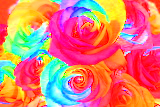

In [45]:
cmytorgb = img_cmyk2rgb(cmy)
Image.fromarray(cmytorgb)